In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [3]:
df = pd.read_csv("mipace_mlproject_all.csv")

In [4]:
df

,Unnamed: 0,age,HR Max,gender,weight,height,bmi,Amb Temp,RH Humidity,Grade,avgHR last 30,MaxSpeed,avgRE,eSV,V02max,uid
0,0,53.356592,167,Male,93.4,181.0,28.5,22,35,True,169.190476,7.6,35.332062,147.395238,43.019048,TR0002081
1,1,37.370281,183,Male,83.3,184.3,24.5,24,35,False,177.259259,8.6,45.988394,152.159259,51.665185,TR0002371
2,2,28.375757,192,Male,92.7,196.7,24.0,22,32,True,186.928571,9.3,45.597972,167.592857,54.454286,TR0002301
3,3,34.013690,186,Female,59.1,167.8,21.0,22,28,True,174.424242,9.3,43.836381,111.990909,53.472121,TR0002391
4,4,60.164274,160,Female,43.0,158.5,17.1,22,36,False,162.846154,9.3,53.696826,96.223077,58.255385,TR0002061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,538,61.073923,159,Female,59.9,166.3,21.7,22,46,True,173.285714,6.4,6.400000,87.346429,41.293929,TR0002163
527,539,56.106778,165,Male,68.4,174.5,22.5,24,44,True,178.500000,8.3,8.300000,141.804167,60.182917,TR0002113
528,540,25.054758,195,Female,63.8,169.3,22.3,21,38,False,197.535714,7.6,7.600000,83.242857,41.830357,TR0002453
529,541,41.961669,179,Female,61.4,156.2,25.2,21,30,True,171.961538,6.4,6.400000,75.815385,34.885000,TR0002423


In [5]:
df.sort_values(by = ['uid'], inplace = True)
#df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
df

,Unnamed: 0,age,HR Max,gender,weight,height,bmi,Amb Temp,RH Humidity,Grade,avgHR last 30,MaxSpeed,avgRE,eSV,V02max,uid
71,73,37.934290,183,Female,52.1,159.9,20.4,21,27,True,188.500000,9.8,53.986906,98.787500,59.314167,TR0001001
266,272,38.087613,182,Female,51.2,160.1,20.0,22,40,False,183.647059,9.2,9.200000,112.605882,64.440588,TR0001002
442,454,38.317597,182,Female,51.7,160.2,20.1,25,41,True,189.692308,9.8,9.800000,107.661539,64.074231,TR0001003
63,65,54.438729,166,Female,55.8,169.0,19.5,21,29,False,147.000000,8.3,41.011939,110.092000,47.112400,TR0001011
64,66,54.592052,166,Female,55.8,170.0,19.3,21,36,False,148.137931,8.3,40.811894,112.034483,47.365517,TR0001011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,145,37.068448,183,Female,64.8,170.0,22.4,24,47,False,182.913043,9.3,50.635994,121.865217,55.976087,TR0003151
339,347,37.191653,183,Female,64.0,170.0,22.1,22,37,False,185.840000,9.9,9.900000,119.416000,56.247600,TR0003152
40,41,35.459968,185,Male,93.5,169.1,32.7,24,48,True,182.285714,6.2,30.671033,124.521429,40.279286,TR0003161
239,244,35.610553,185,Male,84.6,169.2,29.6,22,48,True,177.483871,6.2,6.200000,139.851613,47.619032,TR0003162


In [7]:
df.set_index('uid', inplace = True)

In [8]:
X = df.drop(columns = ['V02max','avgRE', 'Unnamed: 0'])
y = df['V02max']

In [9]:
X

,age,HR Max,gender,weight,height,bmi,Amb Temp,RH Humidity,Grade,avgHR last 30,MaxSpeed,eSV
uid,,,,,,,,,,,,
TR0001001,37.934290,183,Female,52.1,159.9,20.4,21,27,True,188.500000,9.8,98.787500
TR0001002,38.087613,182,Female,51.2,160.1,20.0,22,40,False,183.647059,9.2,112.605882
TR0001003,38.317597,182,Female,51.7,160.2,20.1,25,41,True,189.692308,9.8,107.661539
TR0001011,54.438729,166,Female,55.8,169.0,19.5,21,29,False,147.000000,8.3,110.092000
TR0001011,54.592052,166,Female,55.8,170.0,19.3,21,36,False,148.137931,8.3,112.034483
...,...,...,...,...,...,...,...,...,...,...,...,...
TR0003151,37.068448,183,Female,64.8,170.0,22.4,24,47,False,182.913043,9.3,121.865217
TR0003152,37.191653,183,Female,64.0,170.0,22.1,22,37,False,185.840000,9.9,119.416000
TR0003161,35.459968,185,Male,93.5,169.1,32.7,24,48,True,182.285714,6.2,124.521429


### Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [11]:
X_train

,age,HR Max,gender,weight,height,bmi,Amb Temp,RH Humidity,Grade,avgHR last 30,MaxSpeed,eSV
uid,,,,,,,,,,,,
TR0001001,37.934290,183,Female,52.1,159.9,20.4,21,27,True,188.500000,9.8,98.787500
TR0001002,38.087613,182,Female,51.2,160.1,20.0,22,40,False,183.647059,9.2,112.605882
TR0001003,38.317597,182,Female,51.7,160.2,20.1,25,41,True,189.692308,9.8,107.661539
TR0001011,54.438729,166,Female,55.8,169.0,19.5,21,29,False,147.000000,8.3,110.092000
TR0001011,54.592052,166,Female,55.8,170.0,19.3,21,36,False,148.137931,8.3,112.034483
...,...,...,...,...,...,...,...,...,...,...,...,...
TR0002512,35.498299,185,Female,60.0,165.6,21.9,26,42,True,176.176471,7.9,98.805882
TR0002513,35.802207,185,Female,59.9,165.4,21.9,22,33,False,181.176471,7.9,97.264706
TR0002521,34.947980,186,Male,50.6,154.5,21.2,25,45,True,189.360000,7.2,85.964000


### One-Hot Encoding for Categorical Attributes

In [12]:
cat_attribs = list(X.select_dtypes(exclude = [np.number]))
column_transform = ColumnTransformer([("cat", OneHotEncoder(), cat_attribs)], remainder = 'passthrough')

### Linear Regression

In [13]:
X_train_prepared = column_transform.fit_transform(X_train)
X_test_prepared = column_transform.transform(X_test)

In [14]:
# number of features in X_train_prepared
X_train_prepared.shape[1]

14

In [15]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 15))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train_prepared, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_prepared, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14]}],
             return_train_score=True, scoring='r2', verbose=1)

In [16]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010664,0.002684,0.000522,0.000054,1,{'n_features_to_select': 1},0.055724,0.131262,0.203511,0.089203,...,0.118905,0.049399,14,0.153944,0.136641,0.119516,0.146900,0.123711,0.136142,0.013144
1,0.007662,0.000572,0.000532,0.000092,2,{'n_features_to_select': 2},0.223658,0.131262,0.206696,0.089203,...,0.153129,0.052679,13,0.324448,0.136641,0.110359,0.146900,0.123711,0.168412,0.078978
2,0.007105,0.000289,0.000473,0.000040,3,{'n_features_to_select': 3},0.767560,0.312572,0.351702,0.241928,...,0.398441,0.187991,12,0.738547,0.302896,0.294375,0.321043,0.288773,0.389127,0.175051
3,0.006107,0.000315,0.000466,0.000070,4,{'n_features_to_select': 4},0.948023,0.774396,0.555519,0.766317,...,0.758029,0.124573,11,0.927825,0.741042,0.781047,0.743110,0.744515,0.787508,0.071707
4,0.006981,0.001409,0.000583,0.000113,5,{'n_features_to_select': 5},0.947855,0.932969,0.896199,0.917872,...,0.923474,0.017093,6,0.928165,0.932606,0.938122,0.937050,0.934124,0.934013,0.003530
5,0.010257,0.001924,0.001041,0.000564,6,{'n_features_to_select': 6},0.947429,0.933266,0.893672,0.916480,...,0.922795,0.017915,8,0.930288,0.932803,0.938849,0.937573,0.934245,0.934752,0.003122
6,0.005160,0.000630,0.000517,0.000134,7,{'n_features_to_select': 7},0.946817,0.931008,0.892896,0.914800,...,0.921730,0.017871,10,0.930409,0.935232,0.938912,0.938740,0.934802,0.935619,0.003116
7,0.004343,0.000452,0.000462,0.000073,8,{'n_features_to_select': 8},0.946817,0.930510,0.894204,0.914705,...,0.922285,0.017458,9,0.930409,0.935263,0.939060,0.938753,0.936196,0.935936,0.003123
8,0.003717,0.000385,0.000599,0.000185,9,{'n_features_to_select': 9},0.948026,0.929679,0.896765,0.914978,...,0.922887,0.016896,7,0.930906,0.936342,0.939495,0.939275,0.936201,0.936444,0.003100
9,0.003589,0.000707,0.000509,0.000106,10,{'n_features_to_select': 10},0.948341,0.930710,0.896765,0.914978,...,0.923631,0.017154,5,0.931316,0.936493,0.939495,0.939275,0.936444,0.936604,0.002949


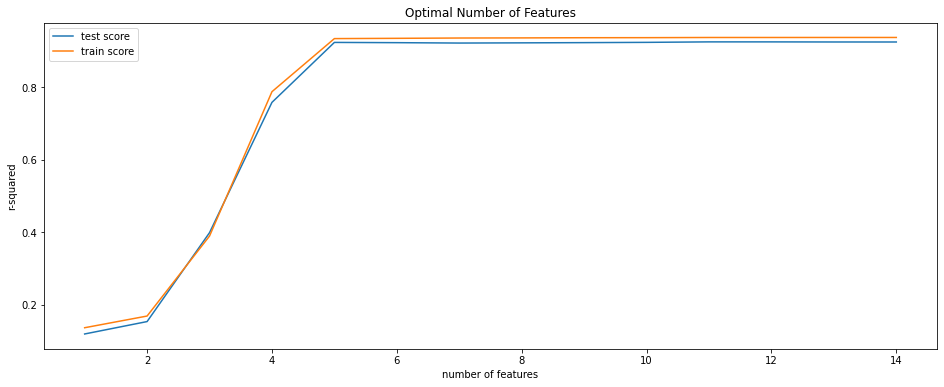

In [17]:
# plotting cv results
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [18]:
import sklearn
# final model
n_features_optimal = 5

lm = LinearRegression()
lm.fit(X_train_prepared, y_train)

#tell RFE how many features we want in the final model. It then runs a feature elimination algorithm.
rfe = RFE(lm, n_features_to_select=n_features_optimal)              
rfe = rfe.fit(X_train_prepared, y_train)

# predict V02MAX of X_test
y_pred = rfe.predict(X_test_prepared)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.930586789670208


In [19]:
# lr = LinearRegression().fit(X_train_prepared, y_train)
# lr.score(X_test_prepared, y_test)

### Random Forest Regressor

In [20]:
#Random Forest is a tree-based model and hence does not require feature scaling.

In [21]:
model = RandomForestRegressor()
param_grid = {'reg__bootstrap': [True, False],
 'reg__max_depth': [10, 20, 30, 40],
 'reg__max_features': ['auto', 'sqrt'],
 'reg__min_samples_leaf': [1, 2, 4],
 'reg__min_samples_split': [2, 5, 10],
 'reg__n_estimators': [200, 400, 600, 800, 1000], }

In [22]:
components = [('column_transformer', column_transform), ('reg', model)]
pipe = Pipeline(components)

In [23]:
#Grid search with one-hot encoding and 5 fold cross validation
grid = GridSearchCV(pipe, param_grid = param_grid, cv = folds, refit = True)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_model.score(X_test, y_test)

0.6893707745880128

### MLP Regressor

In [79]:
model = MLPRegressor()
param_grid = {
    'reg__hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'reg__activation': ['tanh', 'relu'],
    'reg__solver': ['sgd', 'adam'],
    'reg__alpha': [0.0001, 0.05],
    'reg__learning_rate': ['constant','adaptive'],
}

In [80]:
components = [('column_transformer', column_transform), ('scaler', StandardScaler()), ('reg', model)]
pipe = Pipeline(components)

In [81]:
grid = GridSearchCV(pipe, param_grid = param_grid, cv = folds, refit = True)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_model.score(X_test, y_test)

0.9530357223680468

### XGBoost

In [82]:
model = xgb.XGBRegressor()
param_grid = {
    'reg__max_depth': range (5, 10, 1),
    'reg__n_estimators': range(100, 220, 40),
    'reg__learning_rate': [0.1, 0.01, 0.05]
}

In [83]:
components = [('column_transformer', column_transform), ('reg', model)]
pipe = Pipeline(components)

In [84]:
grid = GridSearchCV(pipe, param_grid = param_grid, cv = folds, refit = True)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_model.score(X_test, y_test)

0.8330221693753773

### Support Vector Regressor (SVR)

In [85]:
#Add minmax() scaling 

In [86]:
model = SVR()
param_grid = {
              'reg__C': [0.1, 1, 10, 100], 
              'reg__kernel': ['rbf', 'poly', 'sigmoid'],
              'reg__gamma': [1, 0.1, 0.01, 0.001], 
            }

In [87]:
components = [('column_transformer', column_transform), ('scaler', StandardScaler()), ('reg', model)]
pipe = Pipeline(components)

In [88]:
grid = GridSearchCV(pipe, param_grid = param_grid, cv = folds, refit = True)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_model.score(X_test, y_test)

0.9820017494442441